# 機器學習流程
# 1.讀取資料
# 2.數據清洗
# 3.特徵工程
# 4.相關性分析
# 5.訓練模型

# 1.讀取資料

In [1]:
# 環境準備，使用 Python NumPy、Pandas、seaborn
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
# train資料來源
df_train_url = 'https://raw.githubusercontent.com/micrighost/KaggleNotes_WineQuality_ANN/main/wine_quality_raw_data/train.csv'

df_train = pd.read_csv(df_train_url)

df_train.head(10)

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6
5,5,9.9,0.51,0.44,2.2,0.111,30.0,134.0,0.99820,3.11,0.54,9.6,5
6,6,7.2,0.87,0.00,2.3,0.080,6.0,18.0,0.99552,3.34,0.60,11.3,6
7,7,7.5,0.43,0.32,1.8,0.066,18.0,40.0,0.99560,3.30,0.43,9.7,6
8,8,11.6,0.38,0.55,2.2,0.084,17.0,40.0,1.00080,3.17,0.73,9.8,6
9,9,7.8,0.78,0.09,2.2,0.049,13.0,29.0,0.99682,3.51,0.49,9.5,5


# 2.數據清洗

In [3]:
# 用Pandas中的info()函數，顯示有​​關DataFrame的信息，包括索引的資料類型dtype和列的資料類型dtype，非空值的數量和記憶體使用情況。
df_train.info()

# 初步資訊:沒有缺值真棒

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    2056 non-null   int64  
 1   fixed acidity         2056 non-null   float64
 2   volatile acidity      2056 non-null   float64
 3   citric acid           2056 non-null   float64
 4   residual sugar        2056 non-null   float64
 5   chlorides             2056 non-null   float64
 6   free sulfur dioxide   2056 non-null   float64
 7   total sulfur dioxide  2056 non-null   float64
 8   density               2056 non-null   float64
 9   pH                    2056 non-null   float64
 10  sulphates             2056 non-null   float64
 11  alcohol               2056 non-null   float64
 12  quality               2056 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 208.9 KB


# 3.特徵工程

In [4]:
# 傳統機器學習：利用特徵工程(feature engineering)，人為對資料進行提煉清洗；
# 深度學習：利用表示學習(representation learning)，機器學習模型本身對資料進行特徵精煉

# 4.相關性分析

In [5]:
# 查看各特徵與標籤的相關性
corrDf = pd.DataFrame()
corrDf = df_train.corr()
corrDf['quality'].sort_values(ascending = True)

# 這裡只是大概看一下，等等直接交給神經網路去做篩選

,quality
total sulfur dioxide,-0.225670
volatile acidity,-0.219287
density,-0.153198
free sulfur dioxide,-0.060217
chlorides,-0.046624
pH,0.016378
Id,0.025684
residual sugar,0.048156
fixed acidity,0.073852
citric acid,0.141797


# 5.訓練模型

In [6]:
# 將資料從 DataFrame 轉為 numpy.Array。
# 從資料中提取X_train(特徵)和y_train(目標)

# 行從0位置開始取值到最後(空白代表到底)，列從1位置開始取值到倒數第二(-1)
X_train = df_train.values[0:,1:-1]

# 行從0位置開始取值到最後(空白代表到底)，列從倒數第二的位置開始取值到最後
y_train = df_train.values[0:,-1:]

# 查看特徵的形狀
X_train.shape

(2056, 11)

In [7]:
# 查看目標的形狀
y_train.shape

(2056, 1)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105 (420.00 B)

 Trainable params: 105 (420.00 B)

 Non-trainable params: 0 (0.00 B)

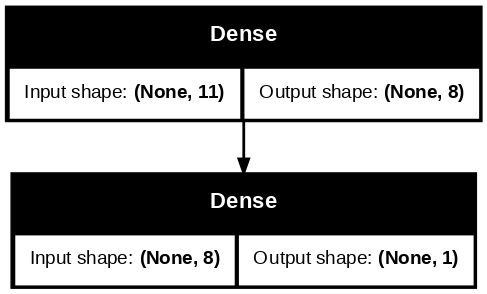

In [8]:
import tensorflow as tf

# 順序模型：類似搭積木一樣一層、一層放上去
# 用Sequential建立模型
model = tf.keras.Sequential()


# input資料
model.add(tf.keras.layers.Input(shape=(11,))) # 傳入11個特徵

# input為11個特徵，output為8個神經元。
# 用relu來收斂
model.add(tf.keras.layers.Dense(8, activation='relu'))

# 輸出1個神經元
model.add(tf.keras.layers.Dense(1))



# 查看模型結構
model.summary()

# 顯示模型
tf.keras.utils.plot_model(model,show_shapes=True,dpi=100) # show_shapes:是否顯示形狀資訊 dpi:圖示大小

In [9]:
# 編譯，設定
# model每層定義好後需經過compile
# optimizer(優化工具)為adam
# loss(損失函數)為keras.losses.mean_squared_error
# Metrics(評估標準)['mae', 'mse']表示我們希望在訓練過程中同時計算，平均絕對誤差(Mean Absolute Error，MAE）和均方誤差（Mean Squared Error，MSE）這兩個指標。
model.compile(optimizer = 'adam',
 loss = 'mse',
 metrics=['mae','mse']
)


# 訓練網絡用fit
# X_train去跟y_train比，全部資料跑10次
# verbose：日誌顯示，0為不在標準輸出流輸出日誌訊息，1為輸出進度條記錄，2為每個epoch輸出一行記錄
# validation_split：0~1之間的浮點數，用來指定訓練集的一定比例資料作為驗證集。
# 請注意:
# 模型的fit函數有兩個參數，shuffle用於將資料打亂，validation_split用於在沒有提供驗證集的時候，以一定比例從訓練集中取出一部分作為驗證集
# 這裡有個陷阱是，程式是先執行validation_split，再執行shuffle的，所以會出現這種情況：
# 假如你的訓練集是有序的，比方說正樣本在前負樣本在後，又設定了validation_split，那麼你的驗證集中很可能將全部是負樣本
# 同樣的，這個東西不會有任何錯誤報出來，因為Keras不可能知道你的數據有沒有經過shuffle，保險起見如果你的數據是沒shuffle過的，最好手動shuffle一下

history = model.fit(X_train, y_train,validation_split=0.25,batch_size=16,epochs = 10)

Epoch 1/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 85.3293 - mae: 6.2057 - mse: 85.3293 - val_loss: 3.4609 - val_mae: 1.5858 - val_mse: 3.4609
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1633 - mae: 1.4719 - mse: 3.1633 - val_loss: 1.7566 - val_mae: 1.0869 - val_mse: 1.7566
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6285 - mae: 1.0219 - mse: 1.6285 - val_loss: 1.0373 - val_mae: 0.8175 - val_mse: 1.0373
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0659 - mae: 0.8056 - mse: 1.0659 - val_loss: 0.8238 - val_mae: 0.7163 - val_mse: 0.8238
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8730 - mae: 0.7250 - mse: 0.8730 - val_loss: 0.7821 - val_mae: 0.6896 - val_mse: 0.7821
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8294 - mae: 0.7055 - mse: 0.8294 - val_loss: 0.7422 - val_mae: 0.6691 - val_mse: 0.7422
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7796 - mae: 0.6867 - mse: 0.7796 - val_loss: 0.719

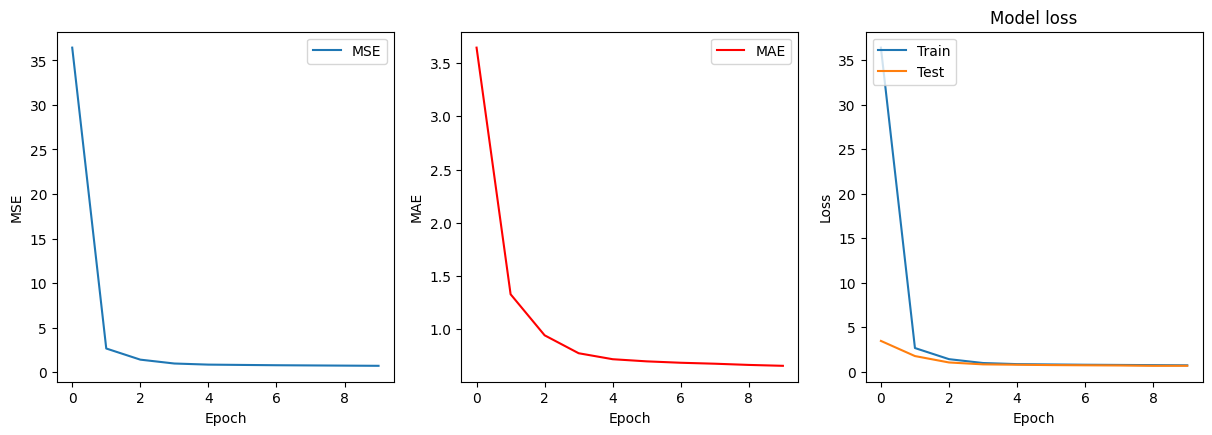

In [10]:
# 設定epoch
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch


# 畫出各種圖
import matplotlib.pyplot as plt

# 畫出mse,mae
def plot_history(hist):

    # figsize是圖形寬度和高度的元組
    plt.figure(figsize=(20,10))

    # .subplot(長(比例), 寬(比例), 繪圖位置參數)
    plt.subplot(2, 4, 1)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    # .plot(x，y，基本線條屬性)
    plt.plot(hist['epoch'], hist['mse'],
           label='MSE')

    # 給圖像加圖例
    plt.legend()

    plt.subplot(2, 4, 2)
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.plot(hist['epoch'], hist['mae'],
           label = 'MAE',color ='red')
    plt.legend()

# 執行plot_history()，並丟入參數hist
plot_history(hist)



# 畫出Train,Test
# 繪製訓練 & 驗證的損失值
plt.subplot(2, 4, 3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

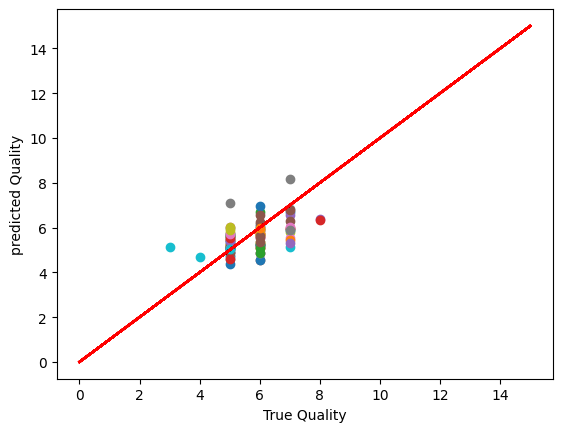

In [11]:
# 圖形化實際與預測

# np.random.choice(從哪個範圍，取幾個)
# 隨機取全部資料的100個編號
indices = np.random.choice(len(X_train), size=100)

count = 0
for n in indices:
    count += 1

    # 把隨機取出的編號的X_train值取出來
    x_t = X_train[n]

    # 用reshape()把數組轉成模型可以輸入的np樣式
    x_t_1 = x_t.reshape(1,11)

    # 用模型進行預測
    predict = model.predict(x_t_1)

    # 把隨機取出的編號的正確答案值取出來
    target = y_train[n]

    # 繪製散布圖
    plt.scatter(target,predict)

    # 由於target比predict為1:1時代表目標與預測相同，所以繪製一條45度線
    # .plot()第一個參數是放x座標的起點到終點，第二個參數是放y座標的起點和終點，第三個參數是放線條的顏色
    plt.plot([0,15],[0,15],'r')
    plt.xlabel('True Quality')
    plt.ylabel('predicted Quality')
plt.show()

# 1.讀取資料

In [12]:
# test資料來源
df_test_url = 'https://raw.githubusercontent.com/micrighost/KaggleNotes_WineQuality_ANN/main/wine_quality_raw_data/test.csv'

df_test = pd.read_csv(df_test_url)

df_test.head(10)

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2056,7.2,0.510,0.01,2.0,0.077,31.0,54.0,0.99748,3.39,0.59,9.8
1,2057,7.2,0.755,0.15,2.0,0.102,14.0,35.0,0.99586,3.33,0.68,10.0
2,2058,8.4,0.460,0.40,2.0,0.065,21.0,50.0,0.99774,3.08,0.65,9.5
3,2059,8.0,0.470,0.40,1.8,0.056,14.0,25.0,0.99480,3.30,0.65,11.7
4,2060,6.5,0.340,0.32,2.1,0.044,8.0,94.0,0.99356,3.23,0.48,12.8
5,2061,6.1,0.320,0.25,2.3,0.073,11.0,86.0,0.99464,3.16,0.70,11.2
6,2062,6.7,0.640,0.05,1.8,0.054,6.0,14.0,0.99456,3.35,0.58,10.9
7,2063,12.5,0.370,0.59,1.8,0.079,3.0,16.0,0.99940,3.16,0.68,10.5
8,2064,6.3,0.470,0.32,1.9,0.069,18.0,85.0,0.99580,3.39,0.55,14.0
9,2065,7.9,0.180,0.40,1.7,0.066,23.0,99.0,0.99914,3.31,0.62,10.0


# 2.數據清洗

In [13]:
# 用Pandas中的info()函數，顯示有​​關DataFrame的信息，包括索引的資料類型dtype和列的資料類型dtype，非空值的數量和記憶體使用情況。
df_test.info()

# 初步資訊:沒有缺值真棒

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1372 non-null   int64  
 1   fixed acidity         1372 non-null   float64
 2   volatile acidity      1372 non-null   float64
 3   citric acid           1372 non-null   float64
 4   residual sugar        1372 non-null   float64
 5   chlorides             1372 non-null   float64
 6   free sulfur dioxide   1372 non-null   float64
 7   total sulfur dioxide  1372 non-null   float64
 8   density               1372 non-null   float64
 9   pH                    1372 non-null   float64
 10  sulphates             1372 non-null   float64
 11  alcohol               1372 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 128.8 KB


# 3.特徵工程

In [14]:
# 傳統機器學習：利用特徵工程(feature engineering)，人為對資料進行提煉清洗；
# 深度學習：利用表示學習(representation learning)，機器學習模型本身對資料進行特徵精煉

# 4.相關性分析

In [15]:
# 等等直接交給神經網路去做篩選

# 5.訓練模型

In [16]:
# 將資料從 DataFrame 轉為 numpy.Array。
# 從資料中提取X_test(特徵)

# 行從0位置開始取值到最後(空白代表到底)，列從1位置開始取值到最後
X_test = df_test.values[0:,1:]


# 查看特徵的形狀
X_test.shape

(1372, 11)

In [17]:
# 進行預測
predict = model.predict(X_test)

# 顯示前五個預測值
predict[:5]

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[5.3370185],
       [5.1914873],
       [5.3743434],
       [5.848209 ],
       [5.345189 ]], dtype=float32)

In [18]:
# 導出預測結果
test_ann_predict = pd.DataFrame()
test_ann_predict['Id'] = df_test['Id']
test_ann_predict['quality'] = predict.round() # .round()四舍五入

# 顯示預測結果
test_ann_predict

,Id,quality
0,2056,5.0
1,2057,5.0
2,2058,5.0
3,2059,6.0
4,2060,5.0
...,...,...
1367,3423,6.0
1368,3424,7.0
1369,3425,5.0
1370,3426,5.0


In [19]:
# 將預測結果導出為csv文件
test_ann_predict.to_csv('./WineQuality_ANN.csv',index=False)